In [128]:
import numpy as np 
import matplotlib.pyplot as plt
import tqdm
import scipy.stats
import time
from scipy import integrate

### Exercise 16

Following the logistic introduced in Example 5, the CDF is: 
\begin{equation*}
    F(x) = \sqrt{x}, x \in [0,1]
\end{equation*}
given that $\pi(x) = \frac{1}{2\sqrt{x}}, x \in [0,1] $. Thus, for $U \sim \mathcal{U}[0,1]$, we could generate the distribution $Y = F^{-1}(U)$:
\begin{equation*}
    F^{-1}(u) = u^2, u \in [0,1]
\end{equation*}

Text(0.5, 1.0, 'QQ Plot')

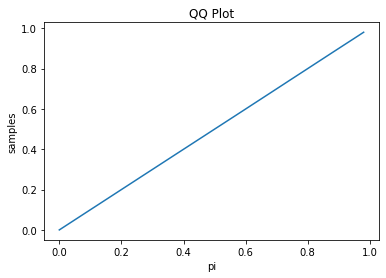

In [129]:
# generate uniform distribution
N = 10**7
u = np.random.rand(N)

# define inverse
def inverse_F(u):
    return u**2

def quantile_real(dd):
    qp = np.quantile(dd,[i/100 for i in range(100)])
    return qp

def quantile_theo(dd):
    return dd**2

q1 = quantile_real(u**2)
q2 = quantile_theo(np.array([i/100 for i in range(100)]))

plt.figure()
plt.plot(q1,q2)
plt.xlabel('pi')
plt.ylabel('samples')
plt.title('QQ Plot')

### Exercise 18

Similar to Example 6 of Box-Muller, we could generate uniform distribution on disk. Suppose $u_1,u_2 \sim \mathcal{U}[0,1]$ that are independent and identically distributed random variables (i.i.d.). Thus, 
\begin{equation*}
\begin{aligned}
    x &= \sqrt{u_1} \cos(2\pi u_2) \\
    y &= \sqrt{u_1} \sin(2\pi u_2) 
\end{aligned}
\end{equation*}

The Jacobian matrix is:
\begin{equation*}
    A = \begin{bmatrix}\dfrac{1}{2\sqrt{u_1}}\cos(2\pi u_2)&-2\pi\sqrt{u_1}\sin(2\pi u_2)\\
    \dfrac{1}{2\sqrt{u_1}}\sin(2\pi u_2)&2\pi\sqrt{u_1}\cos(2\pi u_2)\end{bmatrix}
\end{equation*}
And the determinant is $\pi$. Since $u_1,u_2$ are generated from the uniform distribution and $u_1 = x^2+y^2$:  
\begin{equation*}
\begin{aligned}
    \pi(u_1,u_2) &= 1 | _{0 \le u_1,u_2 \le 1} \\
    \pi(x,y) &= \dfrac{1}{\pi} | _{0 \le x^2 + y^2 \le 1}
\end{aligned}
\end{equation*}
which is the density for $x$ and $y$. 


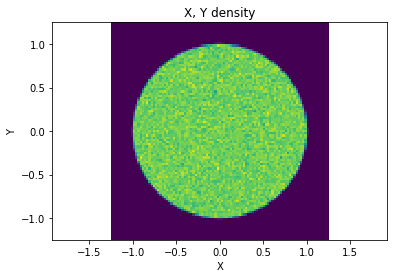

Time for single sample:5.818414688110352e-08s


In [130]:
# Following the derivation and calculation mentioned above
N = 10**6
ss = time.time()
u1 = np.random.rand(N)
u2 = np.random.rand(N)
rr = np.sqrt(u1)
theta = 2*np.pi*u2
x = rr*np.cos(theta)
y = rr*np.sin(theta)
se = time.time()
# Create bins
xbins = np.linspace(np.min(x)-0.25,np.max(x)+0.25,100)
ybins = np.linspace(np.min(y)-0.25,np.max(y)+0.25,100)

plt.figure()
plt.hist2d(x,y,bins=[xbins,ybins])
plt.title('X, Y density')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

print(f'Time for single sample:{(se-ss)/N}s')

### Exercise 19

Consult with Qianyu Zhu for this question.


We could sample from $\tilde{\pi} = \frac{1}{4}|_{-1 \le x,y \le 1}$. Our target is $\pi = \frac{1}{Z}|_{0 \le x^2 + y^2 \le 1}$. The normalizing constant is $\pi$ from the unit disk. We could set $K = 4/Z$ since $1 \le Z \le 4$. Here $\pi/K \tilde{\pi}$ is the indicator function $1|_{0 \le x^2 + y^2 \le 1}$. 

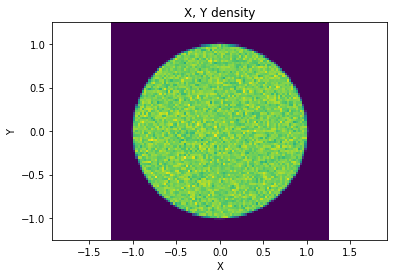

Average cost:1.272737
Time for single sample:6.589165925979614e-06s


In [131]:
N = 10**6
sample = np.zeros(2*N).reshape(2,N)
cc = 0
ss = time.time()
for i in range(N):
    u = np.random.rand()
    cc += 1
    y = np.random.rand(2)*2-1
    # Calculate pi/K*\tilde{pi}
    while(y[0]**2+y[1]**2)>1:
        cc += 1
        y = np.random.rand(2)*2-1
    sample[:,i] = y
se = time.time()
# Create bins
x = sample[0,:]
y = sample[1,:]
xbins = np.linspace(np.min(x)-0.25,np.max(x)+0.25,100)
ybins = np.linspace(np.min(y)-0.25,np.max(y)+0.25,100)

plt.figure()
plt.hist2d(sample[0,:],sample[1,:],bins=[xbins,ybins])
plt.title('X, Y density')
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('equal')
plt.show()

print(f'Average cost:{cc/N}')
print(f'Time for single sample:{(se-ss)/N}s')

### Exercise 20

We know that $\pi = \mathcal{N}(0,1),\tilde{\pi} = \mathcal{N}(m,\sigma^2)$. Also, the $f$ function is $f(y) = 1_{y \ge 2}$. Thus, 
\begin{equation*}
    \dfrac{\pi}{\tilde{\pi}} = \sigma e^{-x^2/2+(x-m)^2/2\sigma^2}
\end{equation*}
By Page 34, our estimator would be: 
\begin{equation*}
    \tilde{f}_N = \dfrac{1}{N}\sum_{k=1}^N f(y^{(k)}) \dfrac{\pi(y^{(k)})}{\tilde{\pi}(y^{(k)})}
\end{equation*}
where $y^{(k)} \sim \tilde{\pi}$. 

In [132]:
N = 10**4
mlst = [i/2 for i in range(10)]
# sigma cannot be 0
sigmalst = [j/2 for j in range(1,11)]
varhist = np.zeros((len(mlst),len(sigmalst)))

# based on previous calculation
def ratiofunc(m,sigma,Y):
    cc = 1/N*sigma*np.exp(-Y**2/2+(Y-m)**2/(2*sigma**2))
    Y[Y<=2] = 0
    Y[Y>2] = 1
    return sum(Y*cc)

for i in range(len(mlst)):
    for j in range(len(sigmalst)):
        hist = np.zeros(2000)
        for k in range(len(hist)):
            Y = np.random.normal(mlst[i],sigmalst[j],N)
            hist[k] = ratiofunc(mlst[i],sigmalst[j],Y)
        varhist[i][j] = np.var(hist)

place = np.argwhere(varhist == np.min(varhist))
indm = int(place[0][0])
indsig = int(place[0][1])
print(f'best m: {mlst[indm]}, best sigma: {sigmalst[indsig]}')


best m: 2.5, best sigma: 0.5


### Exercise 21

In [133]:
N = 10**6
p = lambda x: np.exp(-1*(abs(x))**3)
q = lambda x: 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

res = 0
for i in range(N):
    Y = np.random.normal()
    res += (p(Y)/q(Y))
res /= N

print(f"Normalizing constant: {res}")

integrate.quad(p,-1000,1000)

Normalizing constant: 1.7858613177986262


(1.7859590231384983, 1.681363468483514e-09)

### Exercise 22

Very similar to Exercise 20. The only difference is that we replace the important sampling estimator as: 
\begin{equation*}
    \sum_i \dfrac{f(y^{(i)}) \dfrac{\pi(y^{(i)})}{\tilde{\pi}(y^{(i)})}}{\sum_j \dfrac{\pi(y^{(j)})}{\tilde{\pi}(y^{(j)})}}
\end{equation*}
where $y^{(i)} \sim \tilde{\pi}$. 

In [134]:
N = 10**4
mlst = [i/2 for i in range(10)]
# sigma cannot be 0
sigmalst = [j/2 for j in range(1,11)]
varhist = np.zeros((len(mlst),len(sigmalst)))

# based on previous calculation
def ratiofunc(m,sigma,Y):
    cc = sigma*np.exp(-Y**2/2+(Y-m)**2/(2*sigma**2))
    cc /= sum(cc)
    Y[Y<=2] = 0
    Y[Y>2] = 1
    return sum(Y*cc)

for i in range(len(mlst)):
    for j in range(len(sigmalst)):
        hist = np.zeros(2000)
        for k in range(len(hist)):
            Y = np.random.normal(mlst[i],sigmalst[j],N)
            hist[k] = ratiofunc(mlst[i],sigmalst[j],Y)
        varhist[i][j] = np.var(hist)

place = np.argwhere(varhist == np.min(varhist))
indm = int(place[0][0])
indsig = int(place[0][1])
print(f'best m: {mlst[indm]}, best sigma: {sigmalst[indsig]}')


best m: 1.5, best sigma: 1.5
